# 판다스

In [1]:
import pandas as pd

# 1. 데이터 생성 또는 불러오기

데이터 설명
* customer_id: 고객 ID (정수형).
* name: 고객 이름 (결측치 포함).
* age: 고객 나이 (실수형으로 저장됨).
* signup_date: 가입 날짜 (텍스트로 저장, 잘못된 값 포함).
* purchase_amount: 구매 금액 (실수형).
* is_active: 활성 상태 (다양한 형식의 값 포함).

In [2]:
# 데이터 생성
data_dict = {
    "customer_id": [101, 102, 103, 104, 105],
    "name": ["Alice", "Bob", "Charlie", None, "Eva"],
    "age": [25.0, 30.0, 28.0, 40.0, 35.0],
    "signup_date": ["2023-01-15", "2023-02-20", "2023-03-20", "2023-03-01", "2023-04-10"],
    "purchase_amount": [120.50, 120.2, 200.00, 150.75, 300.40],
    "is_active": [True, False, "yes", "no", True],
    "group": ["A", "A", "B", "C", "C"]
}

# 데이터프레임 생성
data = pd.DataFrame(data_dict)
data


,customer_id,name,age,signup_date,purchase_amount,is_active,group
0,101,Alice,25.0,2023-01-15,120.50,True,A
1,102,Bob,30.0,2023-02-20,120.20,False,A
2,103,Charlie,28.0,2023-03-20,200.00,yes,B
3,104,None,40.0,2023-03-01,150.75,no,C
4,105,Eva,35.0,2023-04-10,300.40,True,C


In [43]:
# data.head(n)      # 처움부터 n개의 데이터를 출력
# data.tail(n)      # 끝에서 n개의 데이터를 출력

# 2. 전처리

목표 
* 결측치 처리: name에서 결측치 확인 및 처리.
* signup_date를 datetime 형식으로 변환 (오류 처리 포함).
* is_active를 논리형(bool)으로 통일.
* customer_id를 인덱스로 설정.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      5 non-null      int64  
 1   name             4 non-null      object 
 2   age              5 non-null      float64
 3   signup_date      5 non-null      object 
 4   purchase_amount  5 non-null      float64
 5   is_active        5 non-null      object 
 6   group            5 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 412.0+ bytes


## 1) 결측치 처리

In [4]:
# 이름에 결측치 있는 것을 확인. Unknown으로 변경
data["name"] = data["name"].fillna("Unknown")
data

,customer_id,name,age,signup_date,purchase_amount,is_active,group
0,101,Alice,25.0,2023-01-15,120.50,True,A
1,102,Bob,30.0,2023-02-20,120.20,False,A
2,103,Charlie,28.0,2023-03-20,200.00,yes,B
3,104,Unknown,40.0,2023-03-01,150.75,no,C
4,105,Eva,35.0,2023-04-10,300.40,True,C


In [5]:
# 데이터 타입 변경
data["age"] = data["age"].astype(int)
data["age"].dtype

dtype('int64')

In [6]:
# 데이터 타입 변경
data["signup_date"] = pd.to_datetime(data["signup_date"], errors="coerce")      # errors 날짜형식이 맞지 않으면 NaT로 반환
data["signup_date"].dtype

dtype('<M8[ns]')

In [9]:
# 데이터 변경 후 타입 변경
data["is_active"] = data["is_active"].replace({"yes":"True", "no":"False"})
data["is_active"] = data["is_active"].astype(bool)
print(data["is_active"].dtype)
data

bool


,customer_id,name,age,signup_date,purchase_amount,is_active,group
0,101,Alice,25,2023-01-15,120.50,True,A
1,102,Bob,30,2023-02-20,120.20,False,A
2,103,Charlie,28,2023-03-20,200.00,True,B
3,104,Unknown,40,2023-03-01,150.75,True,C
4,105,Eva,35,2023-04-10,300.40,True,C


# 3. 조회

1. 열 조회 `df["열"]`, `df[["열1","열2",..]]`
2. 행 조회 `df.loc["행"]`, `df[["행1","행2",..]]`
3. 셀조회 `df.loc["행", "열"]`, `df[["열1","열2",..], ["행1","행2",..]]`
4. 조건부 조회 `df.loc["조건"]` 또는 `df.loc["조건","열"]`, `df.loc["조건",["열1","열2",..]]`


## 1) age가 30 이상인 고객들의 정보를 선택하세요.

In [10]:
data.loc[data["age"] >= 30]

,customer_id,name,age,signup_date,purchase_amount,is_active,group
1,102,Bob,30,2023-02-20,120.20,False,A
3,104,Unknown,40,2023-03-01,150.75,True,C
4,105,Eva,35,2023-04-10,300.40,True,C


## 2) purchase_amount가 150보다 큰 고객들의 이름과 구매 금액만 출력하세요.

In [11]:
data.loc[data["purchase_amount"] > 150, ["name", "purchase_amount"]]

,name,purchase_amount
2,Charlie,200.00
3,Unknown,150.75
4,Eva,300.40


## 3) age가 30 이상이고, purchase_amount가 150 이하인 고객의 정보를 선택하세요.

In [19]:
print(data["age"] < 30)
print(data["purchase_amount"] > 150)
print(data.loc[(data["age"] < 30) & (data["purchase_amount"] > 150)])
print(data.loc[data["age"] < 30])
print(data.loc[data["age"] < 30].loc[data["purchase_amount"] > 150])

0     True
1    False
2     True
3    False
4    False
Name: age, dtype: bool
0    False
1    False
2     True
3     True
4     True
Name: purchase_amount, dtype: bool
   customer_id     name  age signup_date  purchase_amount  is_active group
2          103  Charlie   28  2023-03-20            200.0       True     B
   customer_id     name  age signup_date  purchase_amount  is_active group
0          101    Alice   25  2023-01-15            120.5       True     A
2          103  Charlie   28  2023-03-20            200.0       True     B
   customer_id     name  age signup_date  purchase_amount  is_active group
2          103  Charlie   28  2023-03-20            200.0       True     B


## 4) 그룹이 A, C인 고객의 정보를 선택하세요

In [13]:
data[data["group"].isin(["A", "C"])]

,customer_id,name,age,signup_date,purchase_amount,is_active,group
0,101,Alice,25,2023-01-15,120.50,True,A
1,102,Bob,30,2023-02-20,120.20,False,A
3,104,Unknown,40,2023-03-01,150.75,True,C
4,105,Eva,35,2023-04-10,300.40,True,C


# 4. 편집

* `np.where(조건, A, B)`: 조건에 만족하면 A, 아니면 B로 만든다.
* `시리즈.apply(함수)`: 시리즈의 값들을 함수에 넣어 나온 출력값을 넣는다.
* `데이터프레임.groupby("열1")["열2"].agg(func="함수명")`: 열1 별로 열2에 대함 함수를 구한다(ex. 나이대 별로 수입의 평균을 구한다.)

In [20]:
import pandas as pd
import numpy as np

# 데이터 생성
data = pd.DataFrame({
    "Age": [23, 45, 12, 36, 28],
    "Income": [40000, 50000, 20000, 80000, 45000]
})

# np.where 사용
data["Age_Group"] = np.where(data["Age"] >= 30, "Adult", "Young")
data


,Age,Income,Age_Group
0,23,40000,Young
1,45,50000,Adult
2,12,20000,Young
3,36,80000,Adult
4,28,45000,Young


In [24]:
# 사용자 정의 함수
def categorize_income(income):
    if income < 30000:
        return "Low"
    elif income < 60000:
        return "Medium"
    else:
        return "High"

# apply 사용
data["Income_Category"] = data["Income"].apply(categorize_income)
print(data)

data["Income_Category"] = data["Income"].apply(lambda x: 'Low' if x < 30000 else ("Medium" if x < 60000  else "High"))
print(data)


   Age  Income Age_Group Income_Category
0   23   40000     Young          Medium
1   45   50000     Adult          Medium
2   12   20000     Young             Low
3   36   80000     Adult            High
4   28   45000     Young          Medium
   Age  Income Age_Group Income_Category
0   23   40000     Young          Medium
1   45   50000     Adult          Medium
2   12   20000     Young             Low
3   36   80000     Adult            High
4   28   45000     Young          Medium


In [25]:
# 그룹화와 집계
grouped_data = data.groupby("Age_Group")["Income"].agg(func="mean")
grouped_data

Age_Group
Adult    65000.0
Young    35000.0
Name: Income, dtype: float64

Text(0, 0.5, '수입평균')

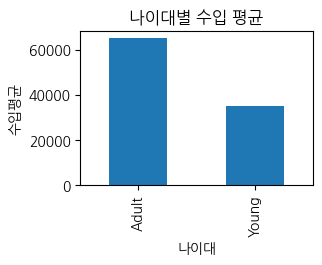

In [ ]:
from matplotlib import pyplot as plt
import koreanize_matplotlib

grouped_data.plot(kind="bar", figsize=(3, 2))
plt.title("나이대별 수입 평균")
plt.xlabel("나이대")
plt.ylabel("수입평균")


